In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score, f1_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_data=pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/train_data.csv')

In [4]:
train_data.shape

(12379, 31)

In [5]:
train_data.describe()

,travelled_more_than_15mins_for_offer,Prefer western over chinese,travelled_more_than_25mins_for_offer,travelled_more_than_5mins_for_offer,restuarant_same_direction_house,Cooks regularly,is foodie,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Travel Time,Prefer home food
count,12379.000000,12379.000000,12379.000000,12379.0,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000
mean,0.565393,0.506665,0.119396,1.0,0.213426,0.499556,0.502706,0.787382,0.415623,1.987802,71.139187,13.947896,0.509815
std,0.495725,0.499976,0.324267,0.0,0.409742,0.500020,0.500013,0.409176,0.492849,1.421653,19.215969,5.395232,0.499924
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,7.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,67.000000,10.000000,0.000000
50%,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,67.000000,14.000000,1.000000
75%,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,89.000000,18.000000,1.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,89.000000,22.000000,1.000000


In [6]:
train_data.isnull().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

In [7]:
train_data.drop('car',axis=1, inplace=True)

In [8]:
train_data['offer expiration']=train_data['offer expiration'].str.replace('2days','48hours')

In [9]:
train_data['offer expiration']=train_data['offer expiration'].str.replace('hours','')

In [10]:
train_data=train_data.replace(np.nan,'')

In [11]:
s= SimpleImputer(missing_values='', strategy= 'most_frequent')

In [12]:
train_data['no_visited_Cold drinks']=s.fit_transform(train_data['no_visited_Cold drinks'].values.reshape(-1,1))

In [13]:
train_data['Restaur_spend_less_than20']=s.fit_transform(train_data['Restaur_spend_less_than20'].values.reshape(-1,1))

In [14]:
train_data['no_visited_bars']=s.fit_transform(train_data['no_visited_bars'].values.reshape(-1,1))

In [15]:
train_data['no_Take-aways']=s.fit_transform(train_data['no_Take-aways'].values.reshape(-1,1))

In [16]:
train_data['Restaur_spend_greater_than20']=s.fit_transform(train_data['Restaur_spend_greater_than20'].values.reshape(-1,1))

In [17]:
train_data['offer expiration']=train_data['offer expiration'].astype(int)

In [18]:
train_data['age']=train_data['age'].str.replace('below21','20')

In [19]:
train_data['age']= train_data['age'].str.replace('50plus','51')

In [20]:
train_data['age']=train_data['age'].astype(int)

In [21]:
train_data['age']=pd.cut(train_data['age'],bins=[0,20,30,40,50,float('Inf')],labels=['below 21','21-30','31-40','41-50','50plus'])

In [22]:
train_data['age']

0           31-40
1          50plus
2           21-30
3           41-50
4           21-30
           ...   
12374      50plus
12375       21-30
12376       31-40
12377       21-30
12378    below 21
Name: age, Length: 12379, dtype: category
Categories (5, object): ['below 21' < '21-30' < '31-40' < '41-50' < '50plus']

array([[<AxesSubplot:title={'center':'offer expiration'}>,
        <AxesSubplot:title={'center':'travelled_more_than_15mins_for_offer'}>,
        <AxesSubplot:title={'center':'Prefer western over chinese'}>,
        <AxesSubplot:title={'center':'travelled_more_than_25mins_for_offer'}>],
       [<AxesSubplot:title={'center':'travelled_more_than_5mins_for_offer'}>,
        <AxesSubplot:title={'center':'restuarant_same_direction_house'}>,
        <AxesSubplot:title={'center':'Cooks regularly'}>,
        <AxesSubplot:title={'center':'is foodie'}>],
       [<AxesSubplot:title={'center':'restuarant_opposite_direction_house'}>,
        <AxesSubplot:title={'center':'has Children'}>,
        <AxesSubplot:title={'center':'visit restaurant with rating (avg)'}>,
        <AxesSubplot:title={'center':'temperature'}>],
       [<AxesSubplot:title={'center':'Travel Time'}>,
        <AxesSubplot:title={'center':'Prefer home food'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

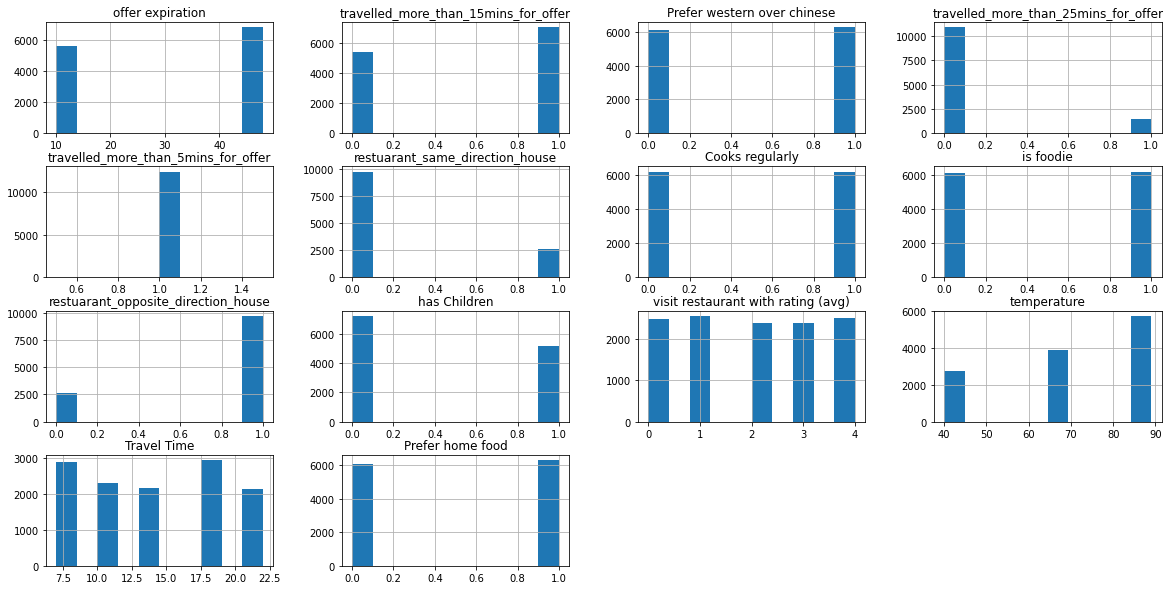

In [23]:
train_data.hist(figsize=(20,10))

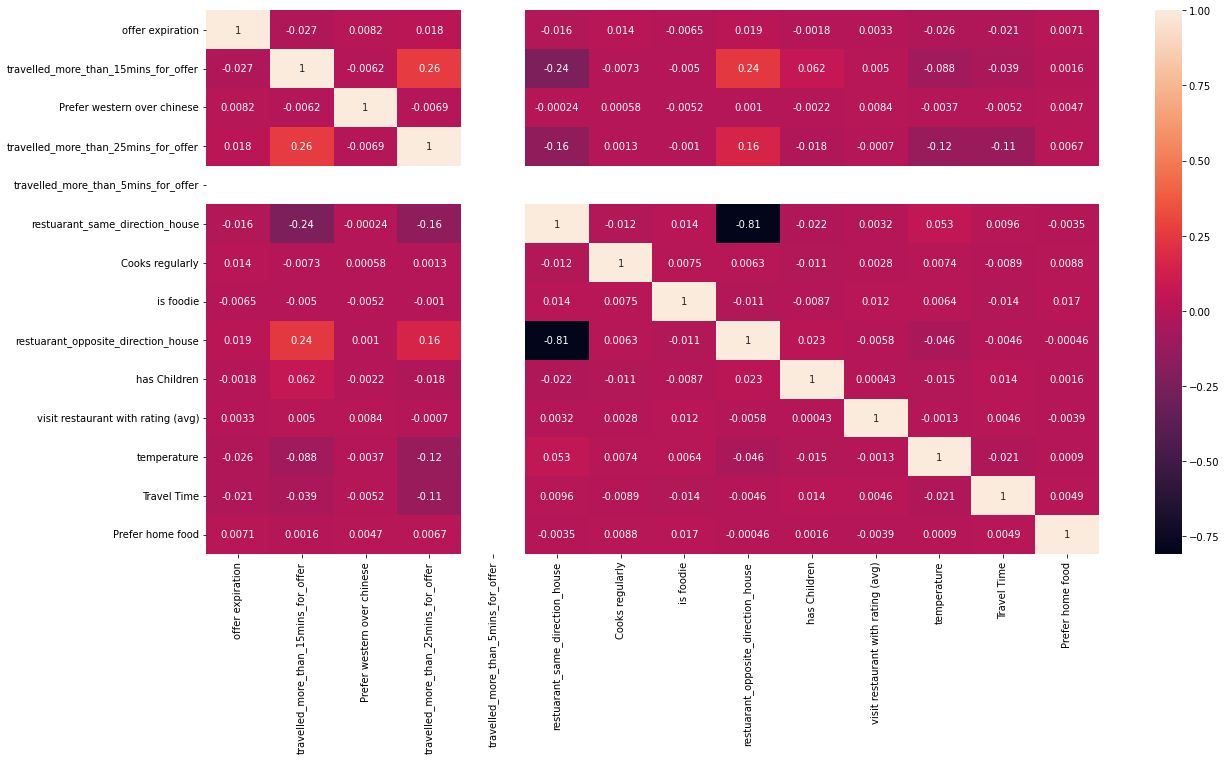

In [24]:
corr_matrix = train_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [25]:
num_features= ['offer expiration','temperature','Travel Time']

In [26]:
num_transformer= MinMaxScaler()

In [27]:
categorical_features_1=['income_range','restaurant type','Qualification']

In [28]:
ordinal=OrdinalEncoder()

In [29]:
categorical_features_2=['no_visited_Cold drinks','Restaur_spend_less_than20','Marital Status','age','no_visited_bars','gender','Customer type','no_Take-aways','Job/Job Industry','Restaur_spend_greater_than20','Climate','drop location']

In [30]:
one_hot= OneHotEncoder()

In [31]:
ct= ColumnTransformer(transformers=[
        ("num", num_transformer, num_features),
        ("cat1", ordinal, categorical_features_1),("cat2",one_hot,categorical_features_2)],remainder='passthrough',sparse_threshold=0)

In [32]:
y_train= train_data['Offer Accepted']

In [33]:
X_train=train_data.drop('Offer Accepted',axis=1)

In [34]:
X_train=ct.fit_transform(X_train)

In [35]:
X_train.shape

(12379, 89)

In [36]:
test_data=pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')

In [37]:
test_data.shape

(5305, 30)

In [38]:
test_data.drop('car',axis=1, inplace=True)

In [39]:
test_data['offer expiration']=test_data['offer expiration'].str.replace('2days','48hours')

In [40]:
test_data['offer expiration']=test_data['offer expiration'].str.replace('hours','')

In [41]:
test_data=test_data.replace(np.nan,'')

In [42]:
test_data['no_visited_Cold drinks']=s.fit_transform(test_data['no_visited_Cold drinks'].values.reshape(-1,1))

In [43]:
test_data['Restaur_spend_less_than20']=s.fit_transform(test_data['Restaur_spend_less_than20'].values.reshape(-1,1))

In [44]:
test_data['no_visited_bars']=s.fit_transform(test_data['no_visited_bars'].values.reshape(-1,1))

In [45]:
test_data['no_Take-aways']=s.fit_transform(test_data['no_Take-aways'].values.reshape(-1,1))

In [46]:
test_data['Restaur_spend_greater_than20']=s.fit_transform(test_data['Restaur_spend_greater_than20'].values.reshape(-1,1))

In [47]:
test_data['offer expiration']=test_data['offer expiration'].astype(int)

In [48]:
test_data['age']=test_data['age'].str.replace('below21','20')

In [49]:
test_data['age']= test_data['age'].str.replace('50plus','51')

In [50]:
test_data['age']=test_data['age'].astype(int)

In [51]:
test_data['age']=pd.cut(test_data['age'],bins=[0,20,30,40,50,float('Inf')],labels=['below 21','21-30','31-40','41-50','50plus'])

In [52]:
X_test= ct.transform(test_data)

In [53]:
X_t1,X_t2,y_t1,y_t2= train_test_split(X_train,y_train,test_size=0.2, random_state=42)

1) DUMMY CLASSIFIER

In [54]:
#d= DummyClassifier(strategy='uniform', random_state=42)

In [55]:
#d.fit(X_t1,y_t1)

In [56]:
#y_d= d.predict(X_t2)

In [57]:
#print(classification_report(y_t2,y_d))

In [58]:
#print(roc_auc_score(y_t2,d.predict_proba(X_t2)[:,1]))

2) LOGISTIC REGRESSION

In [59]:
#lr= LogisticRegression(random_state=42)
#lr.fit(X_t1,y_t1)
#y_lr= lr.predict(X_t2)
#print(classification_report(y_t2,y_lr))

In [60]:
#print(roc_auc_score(y_t2,lr.predict_proba(X_t2)[:,1]))

In [61]:
#params_lr=[{'solver':['lbfgs','liblinear','saga','newton-cg'], 'C':[1,10,100]}]
#grid_lr=GridSearchCV(estimator=lr, param_grid=params_lr, cv=5, scoring='f1_macro')
#grid_lr.fit(X_t1,y_t1)

In [62]:
#grid_lr.best_score_

In [63]:
#grid_lr.best_params_

In [64]:
#lr1= LogisticRegression(C=10,solver='liblinear',random_state=42)
#lr1.fit(X_t1,y_t1)
#y_lr1=lr1.predict(X_t2)
#print(classification_report(y_t2,y_lr1))

In [65]:
#print(roc_auc_score(y_t2,lr1.predict_proba(X_t2)[:,1]))

3) KNEAREST NEIGHBORS

In [66]:
#KNN= KNeighborsClassifier()

In [67]:
#KNN.fit(X_t1,y_t1)

In [68]:
#y_k=KNN.predict(X_t2)

In [69]:
#print(classification_report(y_t2,y_k))

In [70]:
#print(roc_auc_score(y_t2,KNN.predict_proba(X_t2)[:,1]))

In [71]:
#params=[{'n_neighbors':list(range(1,31)),'weights':['uniform','distance'],'metric':['minkowski','euclidean','manhattan']}]
#grid_k= GridSearchCV(estimator=KNN, param_grid=params,scoring='f1_macro')

In [72]:
#grid_k.fit(X_t1,y_t1)

In [73]:
#grid_k.best_score_

In [74]:
#grid_k.best_params_

In [75]:
#knn= KNeighborsClassifier(n_neighbors=29,metric='manhattan',weights='distance')

In [76]:
#knn.fit(X_t1,y_t1)
#y_kn1=knn.predict(X_t2)
#print(classification_report(y_t2,y_kn1))

In [77]:
#print(roc_auc_score(y_t2,knn.predict_proba(X_t2)[:,1]))

4)SUPPORT VECTOR CLASSIFICATION

In [78]:
#svm=SVC(random_state=42,probability=True, kernel='rbf')
#svm.fit(X_t1,y_t1)
#y_s=svm.predict(X_t2)
#print(classification_report(y_t2,y_s))

In [79]:
#print(roc_auc_score(y_t2,svm.predict_proba(X_t2)[:,1]))

In [80]:
#svm1=SVC(C=1, kernel='rbf',gamma=0.1,decision_function_shape='ovr',random_state=42, probability=True)
#svm1.fit(X_t1,y_t1)
#y_svm=svm1.predict(X_t2)
#print(classification_report(y_t2,y_svm))

In [81]:
#print(roc_auc_score(y_t2,svm1.predict_proba(X_t2)[:,1]))

In [82]:
#svm2=SVC(C=10, kernel='poly',degree=2,decision_function_shape='ovr',random_state=42, probability=True)
#svm2.fit(X_t1,y_t1)
#y_svm2=svm2.predict(X_t2)
#print(classification_report(y_t2,y_svm2))

In [83]:
#print(roc_auc_score(y_t2,svm2.predict_proba(X_t2)[:,1]))

5) DECISION TREES

In [84]:
#dt=DecisionTreeClassifier(random_state=42)
#dt.fit(X_t1,y_t1)
#y_d=dt.predict(X_t2)
#print(classification_report(y_t2,y_d))

In [85]:
#print(roc_auc_score(y_t2,dt.predict_proba(X_t2)[:,1]))

In [86]:
#params_dt=[{'criterion':['gini','entropy'],'max_depth':list(range(1,10)),'min_samples_split':[2,4,6,8,10],}]
#grid_dt=GridSearchCV(estimator=dt, param_grid=params_dt,cv=5,scoring='f1_macro')
#grid_dt.fit(X_t1,y_t1)

In [87]:
#grid_dt.best_params_

In [88]:
#grid_dt.best_score_

In [89]:
#dt1=DecisionTreeClassifier(criterion='entropy',max_depth=9, min_samples_split=2, random_state=42)
#dt1.fit(X_t1,y_t1)
#y_dt1=dt1.predict(X_t2)
#print(classification_report(y_t2,y_dt1))

In [90]:
#print(roc_auc_score(y_t2,dt1.predict_proba(X_t2)[:,1]))

6) RANDOM FOREST CLASSIFIER

In [91]:
rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_t1,y_t1)
y_rfc=rfc.predict(X_t2)
print(classification_report(y_t2,y_rfc))

              precision    recall  f1-score   support

          No       0.61      0.40      0.48      1105
         Yes       0.62      0.79      0.70      1371

    accuracy                           0.62      2476
   macro avg       0.61      0.59      0.59      2476
weighted avg       0.61      0.62      0.60      2476



In [92]:
print(roc_auc_score(y_t2,rfc.predict_proba(X_t2)[:,1]))

0.6480469716922286


In [93]:
#params_rfc=[{'criterion':['gini','entropy'],'max_depth':list(range(1,10)),'min_samples_split':[2,4,6,8,10]}]
#grid_rfc= GridSearchCV(estimator=rfc,param_grid=params_rfc,cv=5, scoring='f1_macro')
#grid_rfc.fit(X_t1,y_t1)

In [94]:
#grid_rfc.best_score_

In [95]:
#grid_rfc.best_params_

In [96]:
rfc_1=RandomForestClassifier(n_estimators=860,criterion='gini',max_depth=14,min_samples_split=2,random_state=42, class_weight='balanced')
rfc_1.fit(X_t1,y_t1)
y_rfc1=rfc_1.predict(X_t2)
print(classification_report(y_t2,y_rfc1))

              precision    recall  f1-score   support

          No       0.63      0.45      0.53      1105
         Yes       0.64      0.78      0.70      1371

    accuracy                           0.64      2476
   macro avg       0.63      0.62      0.62      2476
weighted avg       0.63      0.64      0.63      2476



In [97]:
print(roc_auc_score(y_t2,rfc_1.predict_proba(X_t2)[:,1]))

0.6705519305853969


In [98]:
from sklearn.metrics import plot_roc_curve

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


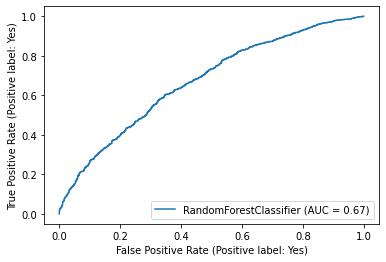

In [99]:
plot_roc_curve(rfc_1,X_t2,y_t2)
plt.show()

7) BAGGING CLASSIFIER

In [100]:
bc=BaggingClassifier(random_state=42)
bc.fit(X_t1,y_t1)
y_bc=bc.predict(X_t2)
print(classification_report(y_t2,y_bc))

              precision    recall  f1-score   support

          No       0.53      0.54      0.53      1105
         Yes       0.62      0.61      0.62      1371

    accuracy                           0.58      2476
   macro avg       0.58      0.58      0.58      2476
weighted avg       0.58      0.58      0.58      2476



In [101]:
print(roc_auc_score(y_t2,bc.predict_proba(X_t2)[:,1]))

0.601986857695443


In [102]:
#params_bc=[{'n_estimators':[100,300,600]}]
#grid_bc=GridSearchCV(estimator=bc, param_grid=params_bc,cv=5, scoring='f1_macro')
#grid_bc.fit(X_t1,y_t1)

In [103]:
#grid_bc.best_score_

In [104]:
#grid_bc.best_params_

In [105]:
bc1=BaggingClassifier(n_estimators=800,random_state=42)
bc1.fit(X_t1,y_t1)
y_bc1=bc1.predict(X_t2)
print(classification_report(y_t2,y_bc1))

              precision    recall  f1-score   support

          No       0.62      0.43      0.51      1105
         Yes       0.63      0.78      0.70      1371

    accuracy                           0.63      2476
   macro avg       0.62      0.61      0.60      2476
weighted avg       0.62      0.63      0.61      2476



In [106]:
print(roc_auc_score(y_t2,bc1.predict_proba(X_t2)[:,1]))

0.6610117132192046


8) GRADIENT BOOSTING CLASSIFIER

In [107]:
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_t1,y_t1)
y_gb=gb.predict(X_t2)
print(classification_report(y_t2,y_gb))

              precision    recall  f1-score   support

          No       0.63      0.39      0.48      1105
         Yes       0.62      0.81      0.71      1371

    accuracy                           0.63      2476
   macro avg       0.63      0.60      0.59      2476
weighted avg       0.63      0.63      0.61      2476



In [108]:
print(roc_auc_score(y_t2,gb.predict_proba(X_t2)[:,1]))

0.6537342693347327


In [109]:
#params_gb=[{'learning_rate':[0.1,0.01,0.001], 'max_depth':list(range(1,10))}]
#grid_gb=GridSearchCV(estimator=gb,param_grid=params_gb, cv=5, scoring='f1_macro') 
#grid_gb.fit(X_t1,y_t1)

In [110]:
#grid_gb.best_score_

In [111]:
#grid_gb.best_params_

In [112]:
gb1=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,min_samples_leaf=35,random_state=42)
gb1.fit(X_t1,y_t1)
y_gb1=gb1.predict(X_t2)
print(classification_report(y_t2,y_gb1))

              precision    recall  f1-score   support

          No       0.60      0.42      0.50      1105
         Yes       0.63      0.78      0.69      1371

    accuracy                           0.62      2476
   macro avg       0.61      0.60      0.59      2476
weighted avg       0.62      0.62      0.61      2476



In [113]:
print(roc_auc_score(y_t2,gb1.predict_proba(X_t2)[:,1]))

0.6691650907122654


9) ADABOOST CLASSIFIER

In [114]:
#ada=AdaBoostClassifier(random_state=42)
#ada.fit(X_t1,y_t1)
#y_ada=ada.predict(X_t2)
#print(classification_report(y_t2,y_ada))

In [115]:
#print(roc_auc_score(y_t2,ada.predict_proba(X_t2)[:,1]))

In [116]:
#params_ada=[{'learning_rate':[1,0.1,0.01,0.001]}]
#grid_a=GridSearchCV(estimator=ada,param_grid=params_ada,cv=5, scoring='f1_macro')
#grid_a.fit(X_t1,y_t1)

In [117]:
#grid_a.best_score_

In [118]:
#grid_a.best_params_

In [119]:
#ada1=AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=42)
#ada1.fit(X_t1,y_t1)
#y_ada1=ada1.predict(X_t2)
#print(classification_report(y_t2,y_ada1))

In [120]:
#print(roc_auc_score(y_t2,ada1.predict_proba(X_t2)[:,1]))

10)XGB CLASSIFIER

In [121]:
xg=xgb.XGBClassifier()


In [122]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
y_label_t1=l.fit_transform(y_t1)
y_label_t2= l.transform(y_t2)

In [123]:
xg.fit(X_t1,y_label_t1)
y_xg=xg.predict(X_t2)
print(classification_report(y_label_t2,y_xg))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52      1105
           1       0.63      0.72      0.67      1371

    accuracy                           0.61      2476
   macro avg       0.60      0.60      0.60      2476
weighted avg       0.61      0.61      0.60      2476



In [124]:
print(roc_auc_score(y_t2,xg.predict_proba(X_t2)[:,1]))

0.6444217815050612


In [125]:
#params_xg= [{'max_depth':list(range(1,10)),'learning_rate':[0.1,1,0.01]}]
#grid_xg=GridSearchCV(estimator=xg, param_grid=params_xg, cv=5, scoring='f1_macro')
#grid_xg.fit(X_t1,y_label_t1)

In [126]:
#grid_xg.best_score_

In [127]:
#grid_xg.best_params_

In [128]:
xg1=XGBClassifier(learning_rate=0.1,max_depth=5,colsample_bytree=0.5,reg_alpha=0.8,random_state=42)
xg1.fit(X_t1,y_label_t1)
y_xg1=xg1.predict(X_t2)
print(classification_report(y_label_t2,y_xg1))

              precision    recall  f1-score   support

           0       0.64      0.43      0.52      1105
           1       0.64      0.81      0.71      1371

    accuracy                           0.64      2476
   macro avg       0.64      0.62      0.62      2476
weighted avg       0.64      0.64      0.63      2476



In [129]:
print(roc_auc_score(y_t2,xg1.predict_proba(X_t2)[:,1]))

0.6670211326409035


11) MLP CLASSIFIER

In [130]:
#mlp=MLPClassifier(random_state=42)
#mlp.fit(X_t1,y_t1)
#y_mlp=mlp.predict(X_t2)
#print(classification_report(y_t2,y_mlp))

In [131]:
#print(roc_auc_score(y_t2,mlp.predict_proba(X_t2)[:,1]))

In [132]:
#params_mlp=[{'alpha':[0.01,0.0001,0.001],'learning_rate':['constant','invscaling']}]
#grid_mlp=GridSearchCV(estimator=mlp, param_grid=params_mlp, cv=5, scoring='f1_macro')
#grid_mlp.fit(X_t1,y_t1)

In [133]:
#grid_mlp.best_score_

In [134]:
#grid_mlp.best_params_

In [135]:
#mlp1= MLPClassifier(hidden_layer_sizes=(25,),alpha=0.01, learning_rate='constant',random_state=42)
#mlp1.fit(X_t1,y_t1)
#y_mlp1=mlp1.predict(X_t2)
#print(classification_report(y_t2,y_mlp1))

In [136]:
#print(roc_auc_score(y_t2,mlp1.predict_proba(X_t2)[:,1]))

12) VOTING CLASSIFIER

In [137]:
vc= VotingClassifier(estimators=[('xg',xg1),('bc',bc1),('rfc',rfc_1),('gb',gb1)],voting='soft')

In [138]:
#vc.fit(X_t1,y_t1)
#y_vc=vc.predict(X_t2)
#print(classification_report(y_t2,y_vc))

In [139]:
#print(roc_auc_score(y_t2,vc.predict_proba(X_t2)[:,1]))

In [140]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.5,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.1, max_bin=256,
                                            max_c...
                                            n_estimators=100, n_jobs=0,
                                           

In [141]:
prediction=vc.predict(X_test)

In [142]:
submission=pd.DataFrame(columns=['id','Offer Accepted'])
submission['id']=[i for i in range(len(prediction))]
submission['Offer Accepted']= prediction

In [143]:
submission.head()

,id,Offer Accepted
0,0,Yes
1,1,Yes
2,2,No
3,3,No
4,4,Yes


In [144]:
submission.to_csv('submission.csv', index=False)